# Distance Estimation from Phase Measurements
In this task, you will work on the data in ‘./Lab_Data/lab3_task1.txt’. The setting of the data collection is as follows. We move the RFID tag in a straight line away from the RFID reader and collect phase measurements. We move the RFID tag away from the RFID reader by a distance d and collect phase measurements at each position. 

You are required to compute the phase change at different positions and use that to estimate the distance d as well as the total distance moved by the tag. 
Plot the phase variation vs Time as well as the distance variation vs time. 

In [9]:
def get_phase_change(pha):
    pha_rad = np.deg2rad(pha)  # Convert degrees to radians (0 to π)
    pha_rad_doubled = pha_rad  # Scale to 0 to 2π radians
    pha_unwrapped = np.unwrap(pha_rad_doubled, period=np.pi)  # Unwrap phase
    pha_unwrapped_deg = np.rad2deg(pha_unwrapped)  # Convert back to degrees
    dpha = np.diff(pha_unwrapped_deg)  # Compute phase difference
    dpha = np.insert(dpha, 0, 0)  # Insert zero at the beginning
    return dpha

def get_dist_change(dpha, wavelength):
    ddist = (dpha / 360) * wavelength / 2  # Compute distance change
    return ddist

In [10]:
# %%
from utils import read_data
## Task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Insert data file path here
file = 'Lab_Data/lab3_task1.txt'

# Read data
channel_log = read_data(file)


# Extract and process data
pha = channel_log['Phase'].astype(float).values
freq = channel_log['Frequency'].iloc[0].astype(float) * 1e3
time = ((channel_log['hour'] * 60 + channel_log['minute']) * 60 + channel_log['second']).astype(float).values
time = time - time[0]
c = 3e8
# Compute phase change and distance change
dpha = get_phase_change(pha)
ddist = get_dist_change(dpha, wavelength= c / freq)

# Cumulative distance
dist = np.cumsum(ddist)

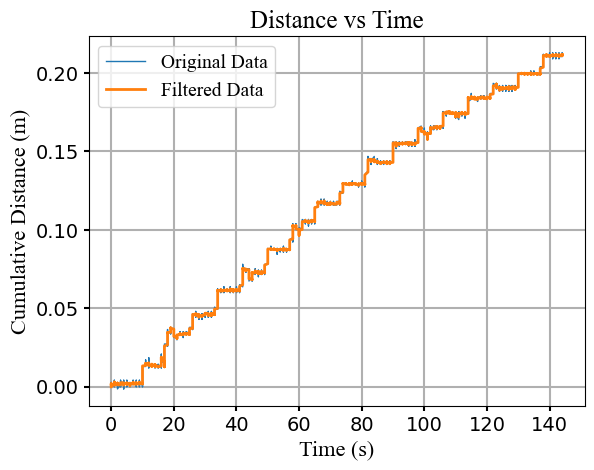

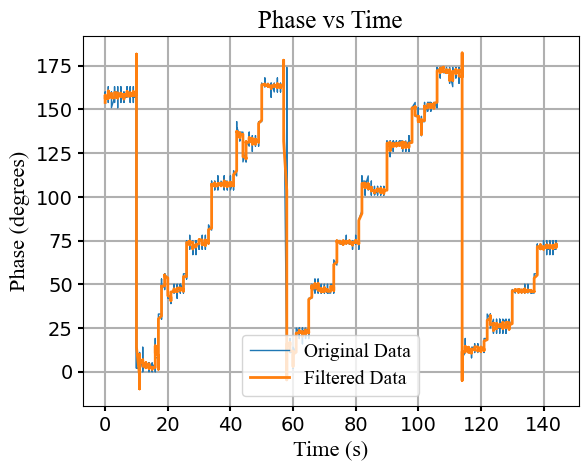

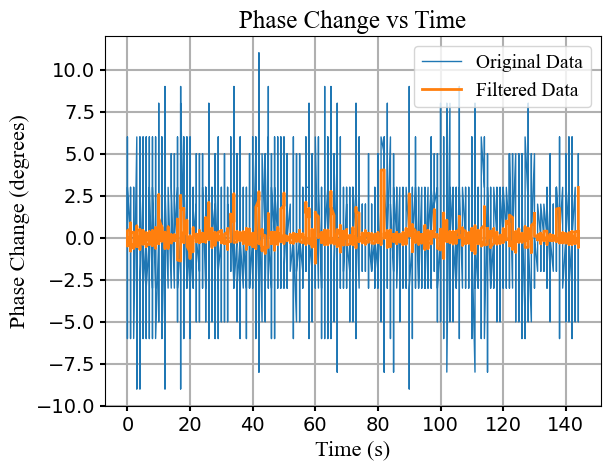

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Define a low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Suponiendo que time, dist, pha, dpha, y ddist ya están definidos

# Cumulative distance
dist = np.cumsum(ddist)

# Sampling frequency (assuming uniform time intervals)
fs = 1 / np.mean(np.diff(time))
cutoff_freq = fs / 10  # Adjust cutoff frequency as needed

# Apply low-pass filter to the data
dist_filtered = lowpass_filter(dist, cutoff_freq, fs)
pha_filtered = lowpass_filter(pha, cutoff_freq, fs)
dpha_filtered = lowpass_filter(dpha, cutoff_freq, fs)

# Function to create and save plots with transparent background
def create_plot(time, original, filtered, xlabel, ylabel, title, filename):
    fig = plt.figure(facecolor='none')
    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor('none')  # Set axes background to transparent

    ax.plot(time, original, label='Original Data', linewidth=1)
    ax.plot(time, filtered, label='Filtered Data', linewidth=2)
    ax.set_xlabel(xlabel, fontname='Times New Roman', fontsize=16)
    ax.set_ylabel(ylabel, fontname='Times New Roman', fontsize=16)
    ax.set_title(title, fontname='Times New Roman', fontsize=18)
    ax.grid(True, linewidth=1.5)
    
    legend = ax.legend(fontsize=14)
    for text in legend.get_texts():
        text.set_fontname('Times New Roman')
        text.set_backgroundcolor('none')  # Set legend background to transparent
    
    ax.tick_params(axis='both', which='major', labelsize=14, width=1.5)
    
    plt.savefig(filename, dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close(fig)  # Close the figure to free memory

# Plotting Distance vs Time
create_plot(
    time=time,
    original=dist,
    filtered=dist_filtered,
    xlabel='Time (s)',
    ylabel='Cumulative Distance (m)',
    title='Distance vs Time',
    filename='distance_vs_time.pdf'
)

# Plotting Phase vs Time
create_plot(
    time=time,
    original=pha,
    filtered=pha_filtered,
    xlabel='Time (s)',
    ylabel='Phase (degrees)',
    title='Phase vs Time',
    filename='phase_vs_time.pdf'
)

# Plotting Phase Change vs Time
create_plot(
    time=time,
    original=dpha,
    filtered=dpha_filtered,
    xlabel='Time (s)',
    ylabel='Phase Change (degrees)',
    title='Phase Change vs Time',
    filename='phase_change_vs_time.pdf'
)

plt.show()
